#### Codebasics
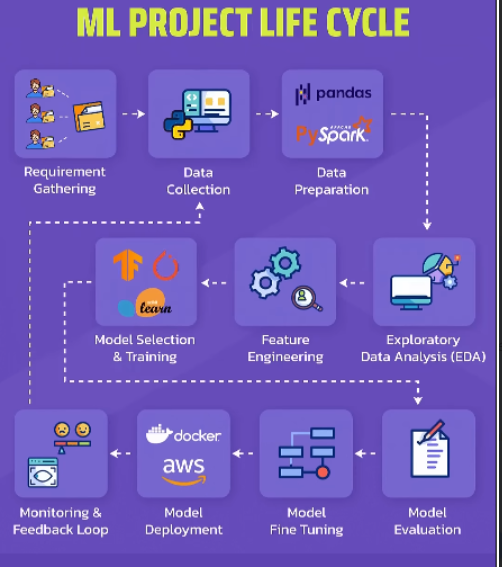   

#### DswithBAPPY

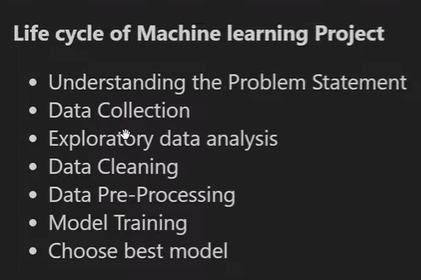

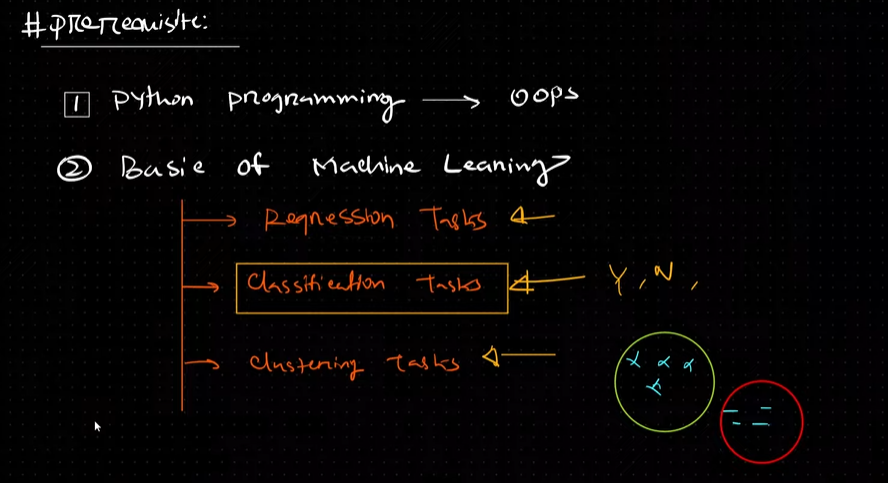  

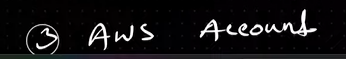

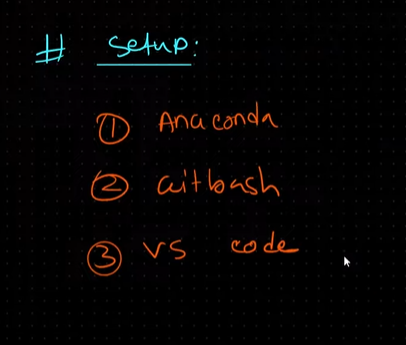

# Project Name   

## First Video (https://www.youtube.com/watch?v=KF3MPzsnMdU&list=PLkz_y24mlSJZvJOj1UXiJPVRQrNFdNEXX&index=1&pp=iAQB)

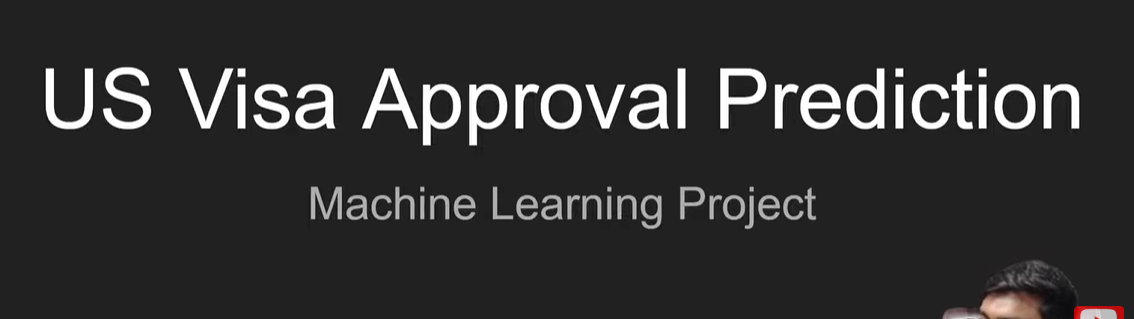

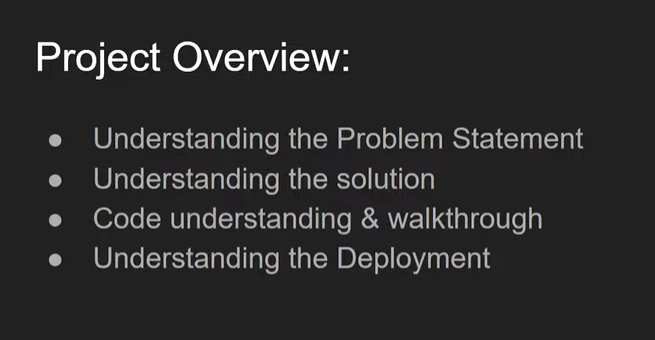   


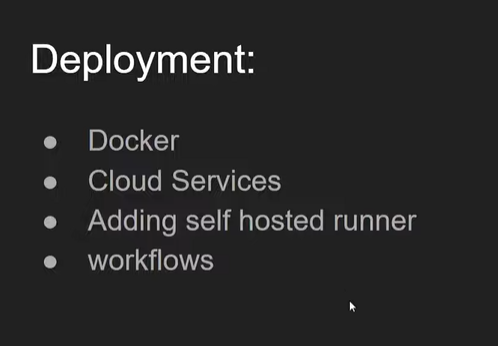

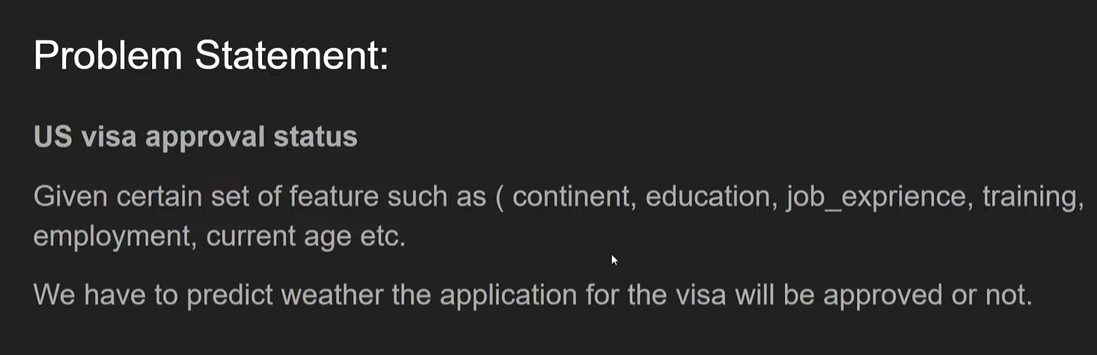

# Data Kaggle = https://www.kaggle.com/datasets/moro23/easyvisa-dataset

# Distinct categorical features and numerical feature range
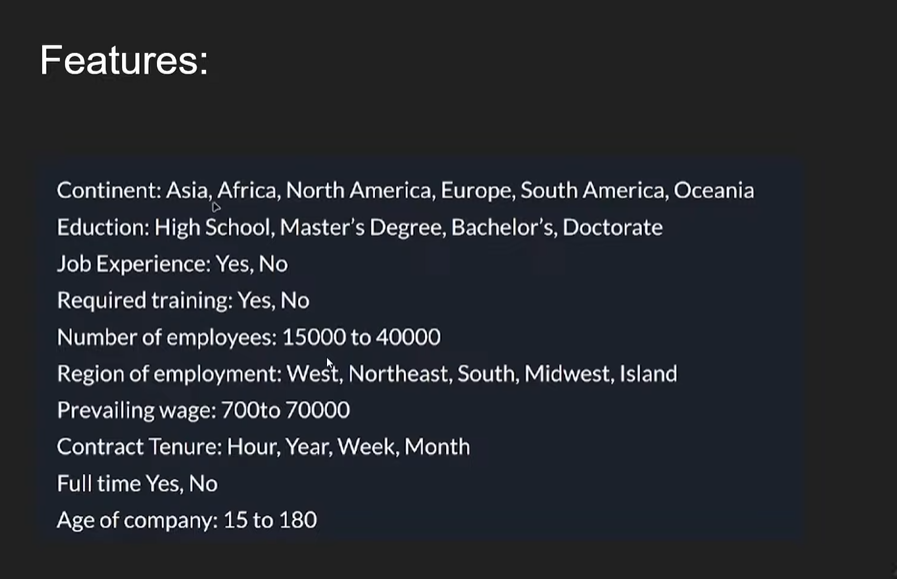

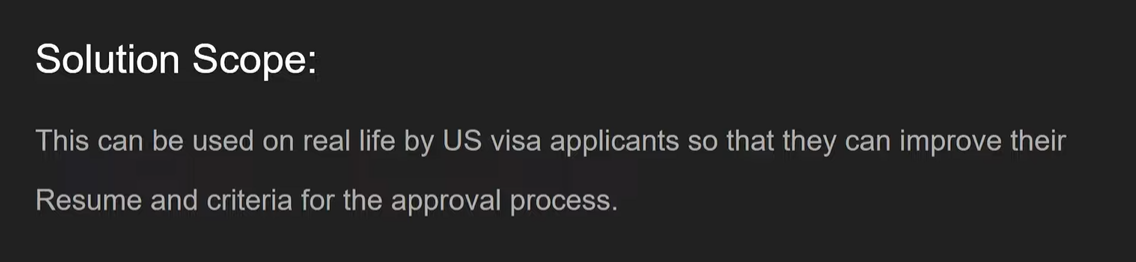

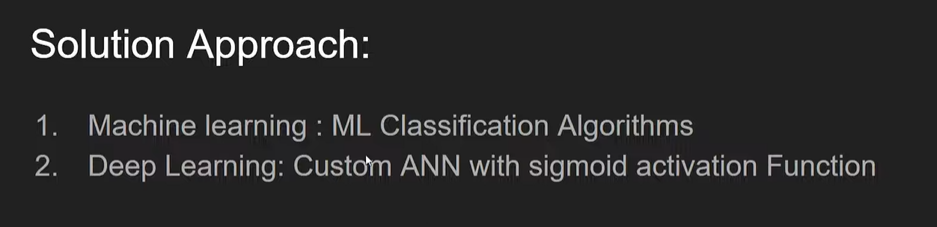

#### In realworld we load data from a database instead of a csv
#### Eg: Food delivery app save GPS data inside mongodb not csv
#### Eg: Patient EHR store data inside EHR db not csv
#### Then we fetch these data from db and convert to pandas dataframe then aggregate and use for ML model training

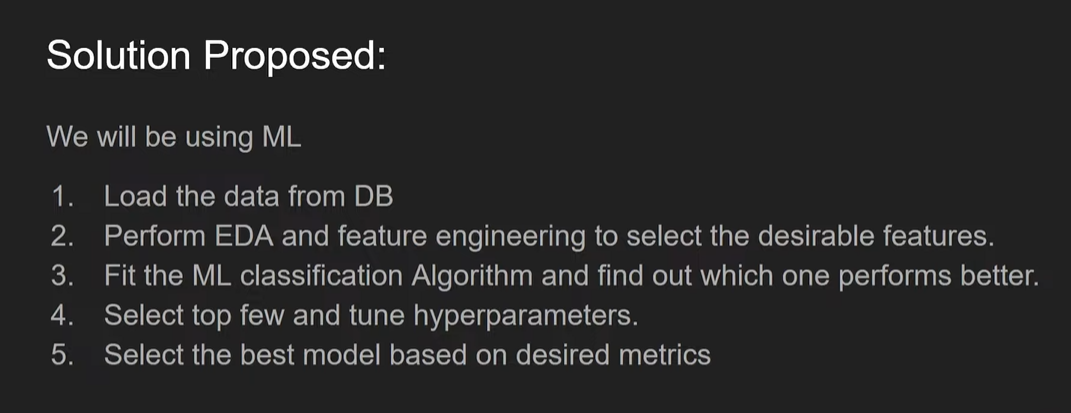

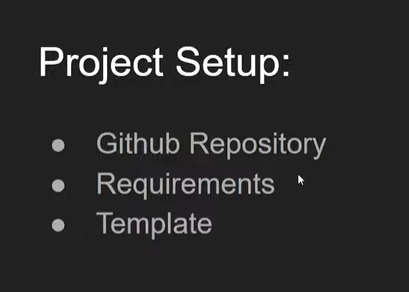

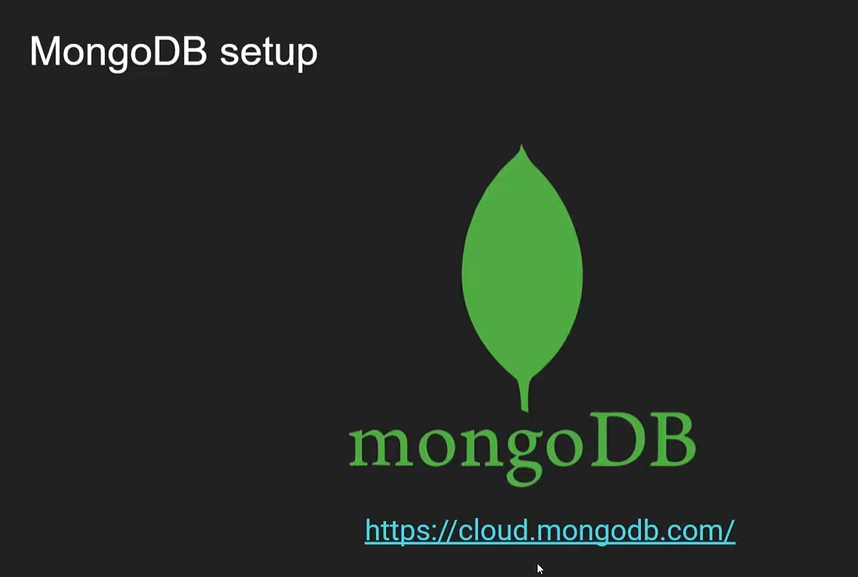

# 1. Folder Structure  

![folder structure.png](<attachment:folder structure.png>)
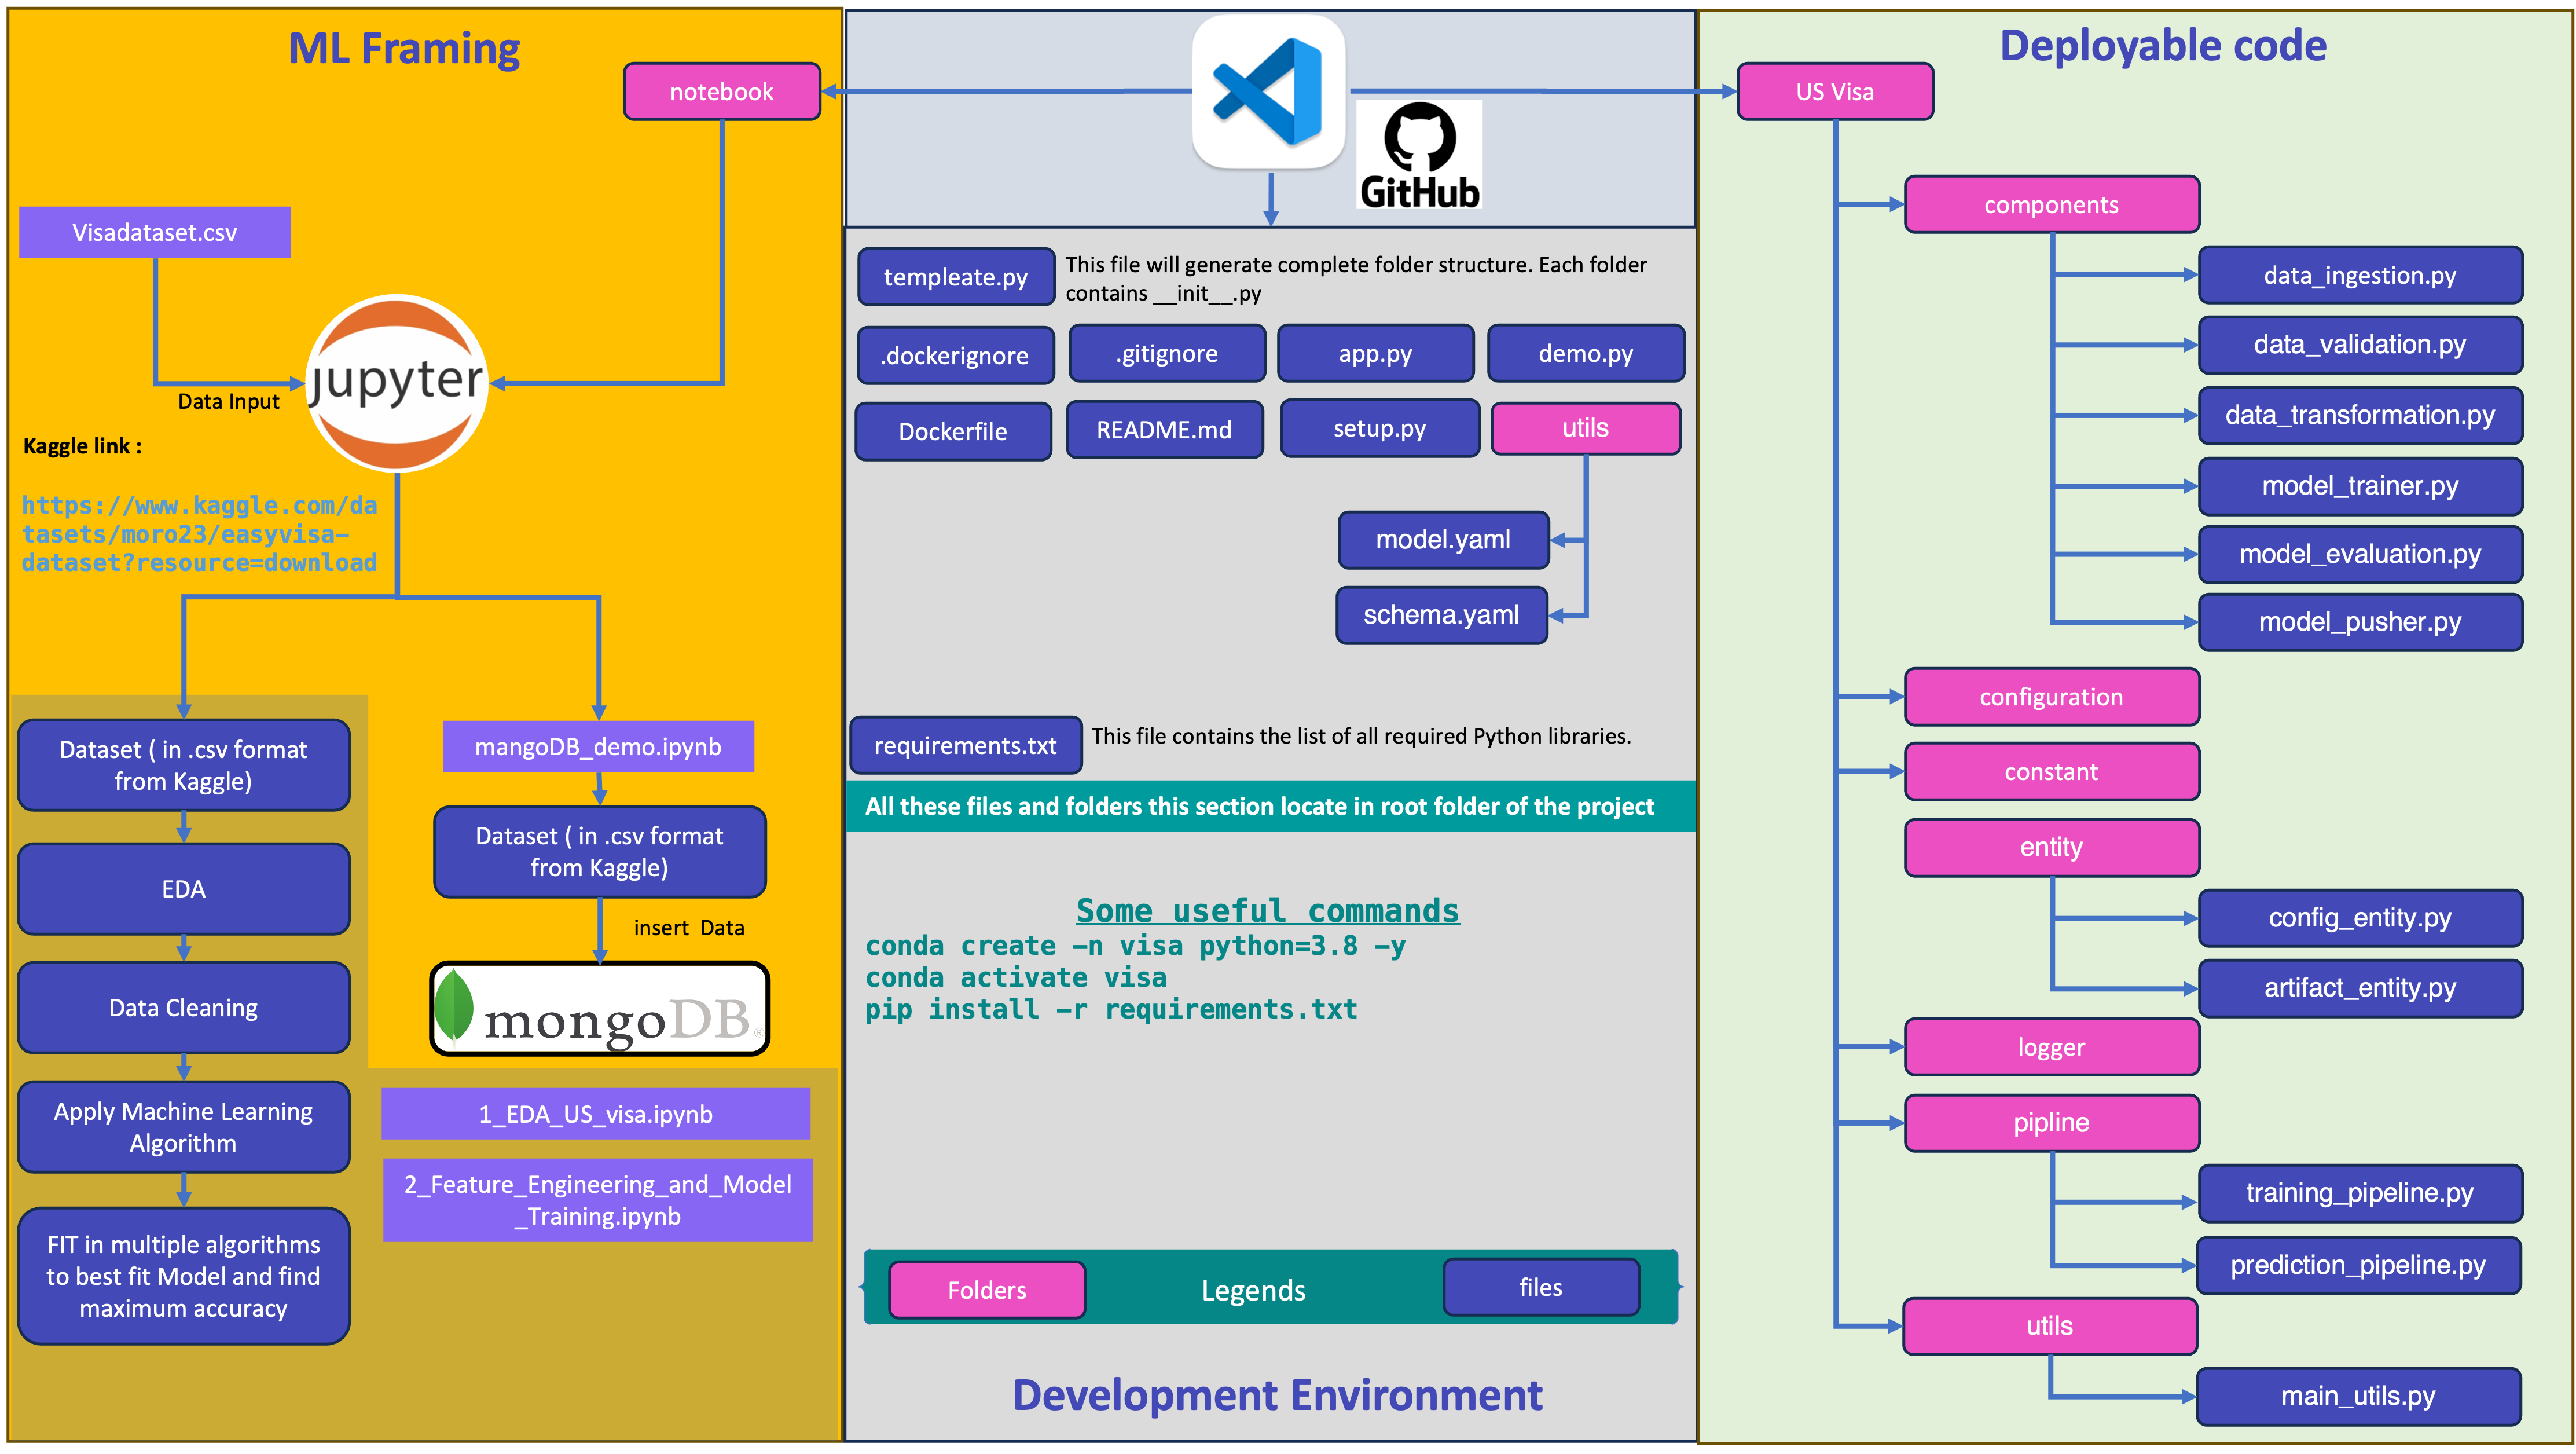

## Second video (https://www.youtube.com/watch?v=1XmQcWtiseY&list=PLkz_y24mlSJZvJOj1UXiJPVRQrNFdNEXX&index=2)

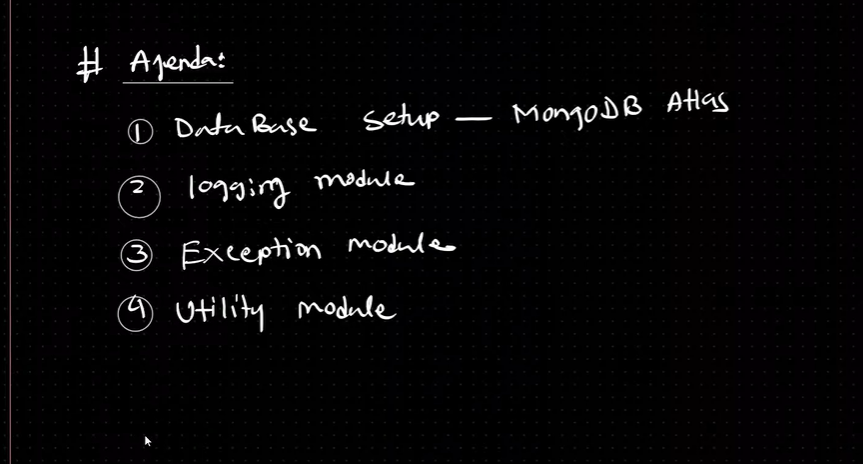

#### Explanation of diagram : Download dataset from https://www.kaggle.com/datasets/moro23/easyvisa-dataset and ingest into mongodb using (C:\Users\subin\OneDrive\Desktop\MLOPS\DSwithBappy\MLOPS\ML\MLOPS-MachineLearning-Project-End2End\notebook\mongodb_demo.ipynb) then fetch the data from the db using mongodb api and convert to pandas dataframe.

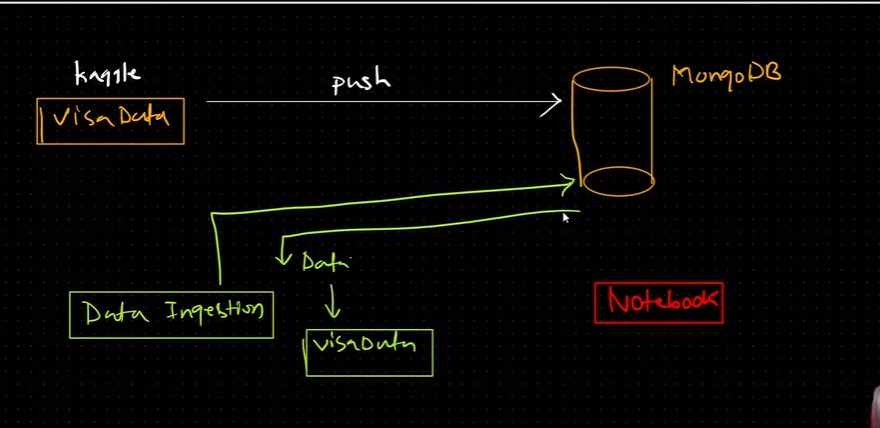

#### Create account in mongodb

1) Enable free cluster in AWS with name 'usvisaaws'
2) Create project named 'usvisaproject' inside the cluster 'usvisaaws'
3) Create database named 'US_VISA' inside the project 'usvisaproject'
4) Create collection in the db named 'US_VISA' as 'us_visa_collection'
5) After a long period of inactive session mongodb will automatically deactivate the cluster because it is free, you may have to reconnect it.   

6) Press this  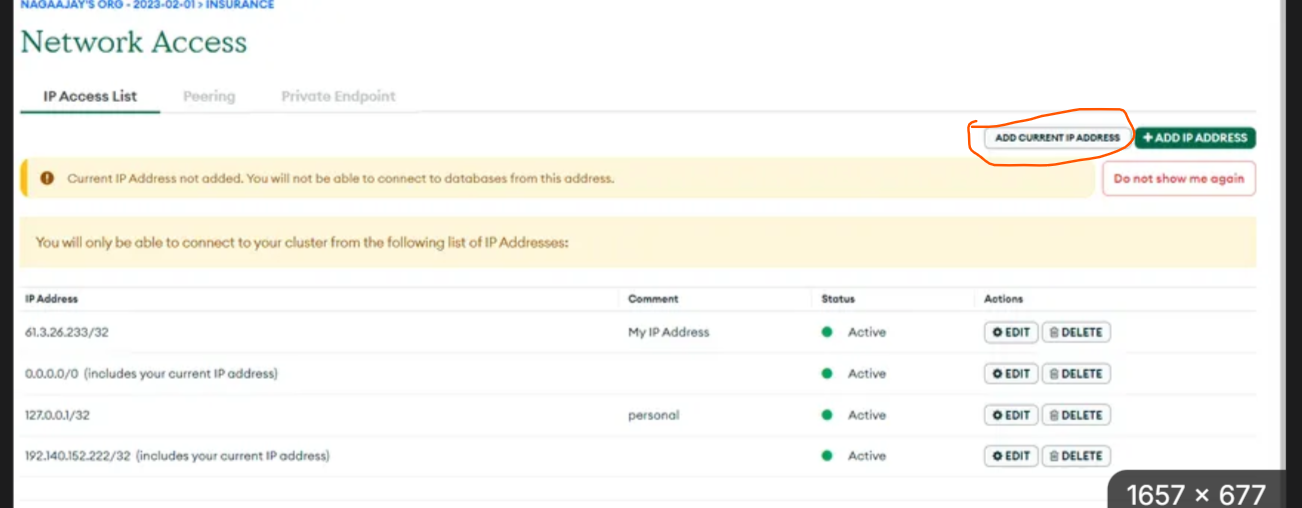  

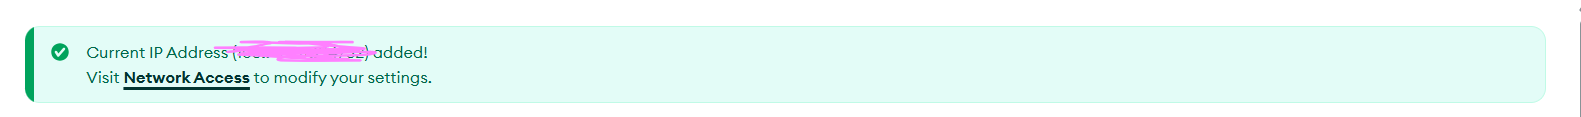  

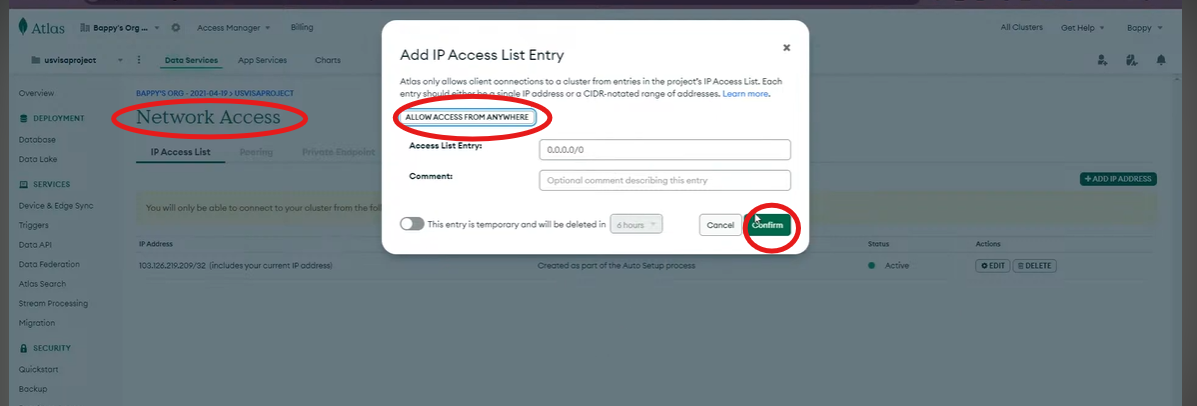  

7) Upload data from "C:\Users\subin\OneDrive\Desktop\MLOPS\DSwithBappy\MLOPS\ML\MLOPS-MachineLearning-Project-End2End\data\EasyVisa.csv" into

8) Data in "C:\Users\subin\OneDrive\Desktop\MLOPS\DSwithBappy\MLOPS\ML\MLOPS-MachineLearning-Project-End2End\data\EasyVisa.csv" is csv (structured) we need to convert it to dictionary (df.to_dict(orient='records')) to upload to mongodb collection (unstructured).

9) When you fetch the data from mongodb for EDA or preprocessing, you have to convert it to dataframe again using (pd.DataFrame(list(collection.find())))


## Video 3 (https://www.youtube.com/watch?v=c5RAMW8jGMo&list=PLkz_y24mlSJZvJOj1UXiJPVRQrNFdNEXX&index=3)

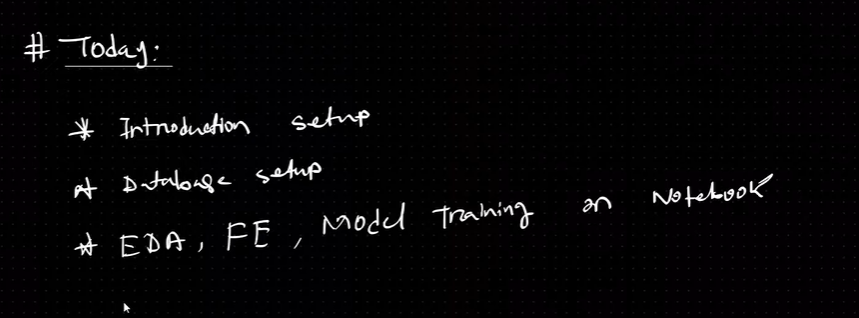

#### He said EDA is a must because without fully understanding the data—its distributions, outliers, skewness, correlations, imbalance, irrelevant features, and categorical behavior—you cannot decide what feature engineering steps are needed, which preprocessing techniques to apply, or even which models will work well. EDA reveals the real structure and problems in the dataset, and those insights directly determine the transformations, encodings, balancing methods, and model-selection strategy. Without doing EDA first, you would blindly build a model that almost certainly performs poorly, because you never understood what the data was actually telling you.

# In EDA you are only analyzing the data, but in feature engineering and data preprocessing you are changing the data or playing with the data.

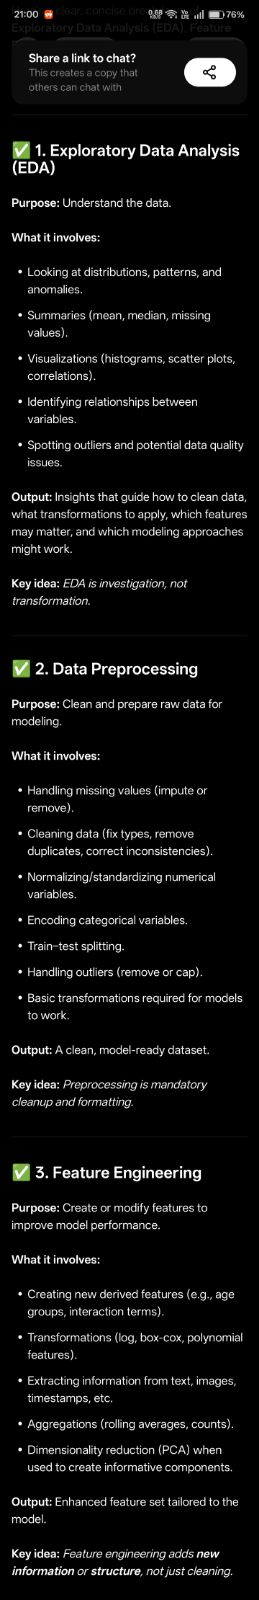

## Video 3 (https://www.youtube.com/watch?v=V0qlnIjLBw4&list=PLkz_y24mlSJZvJOj1UXiJPVRQrNFdNEXX&index=5)

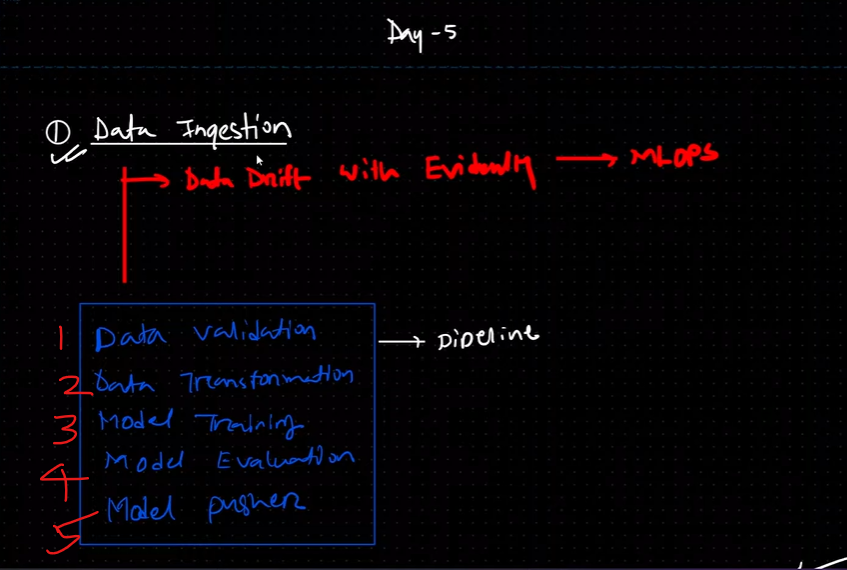

#### High Level Diagram  

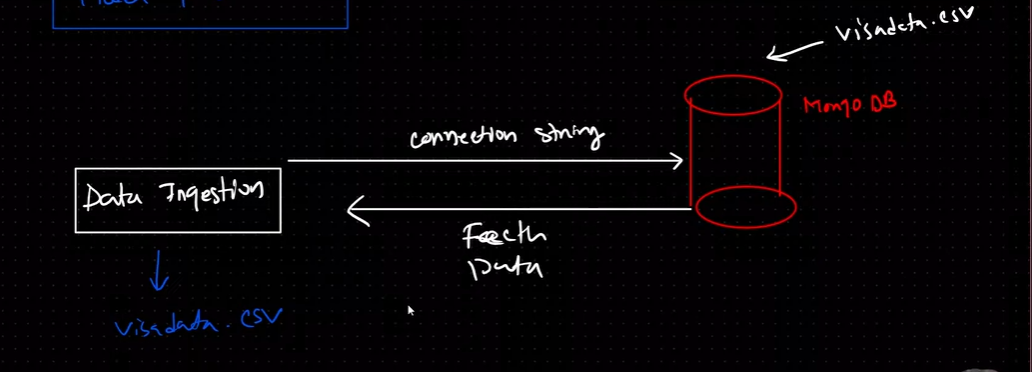   

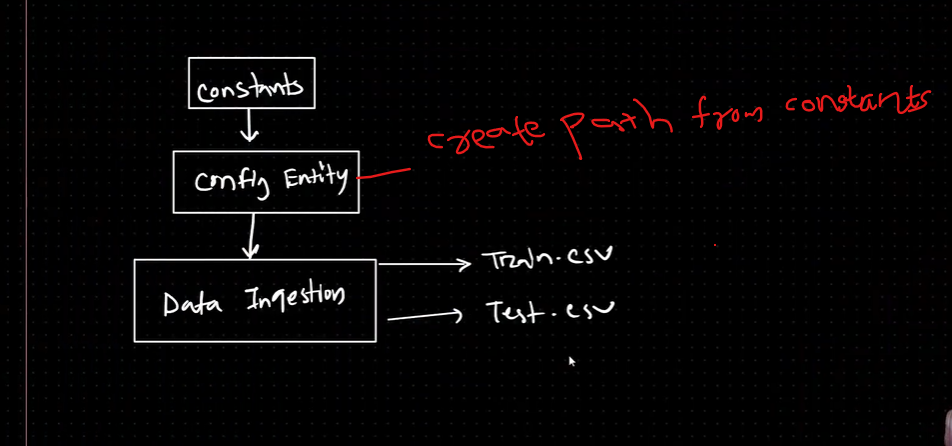  

#### Pipeline  


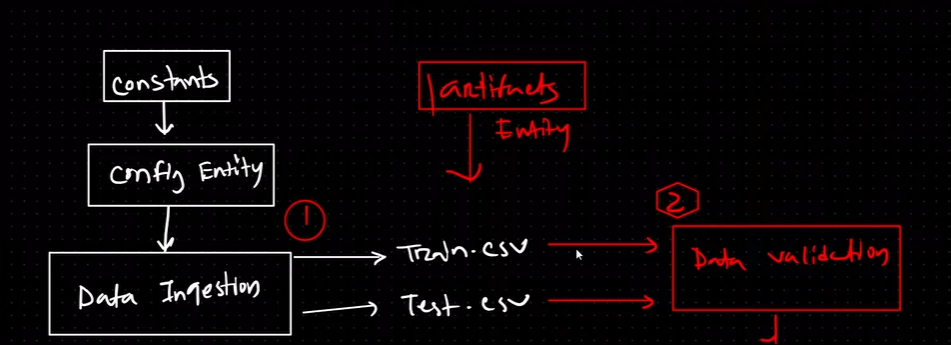  

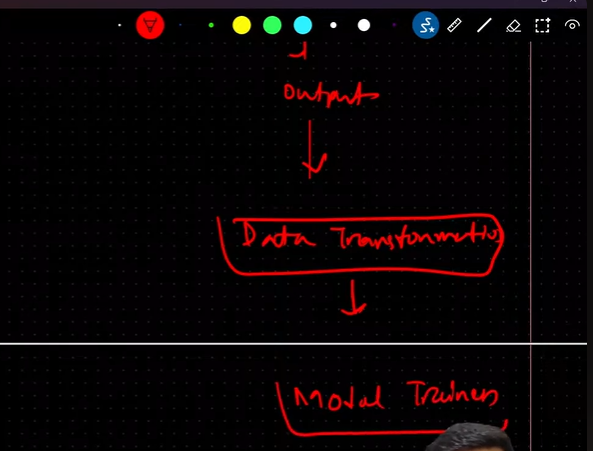  

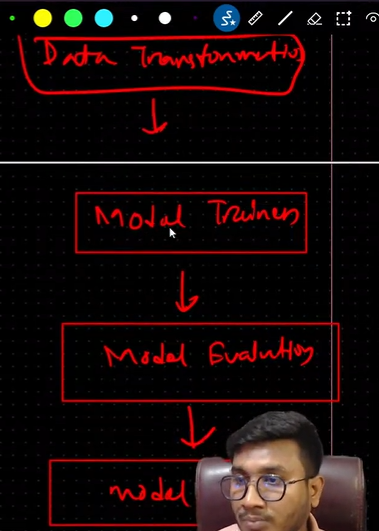

![Data Ingestion.png](<attachment:Data Ingestion.png>)
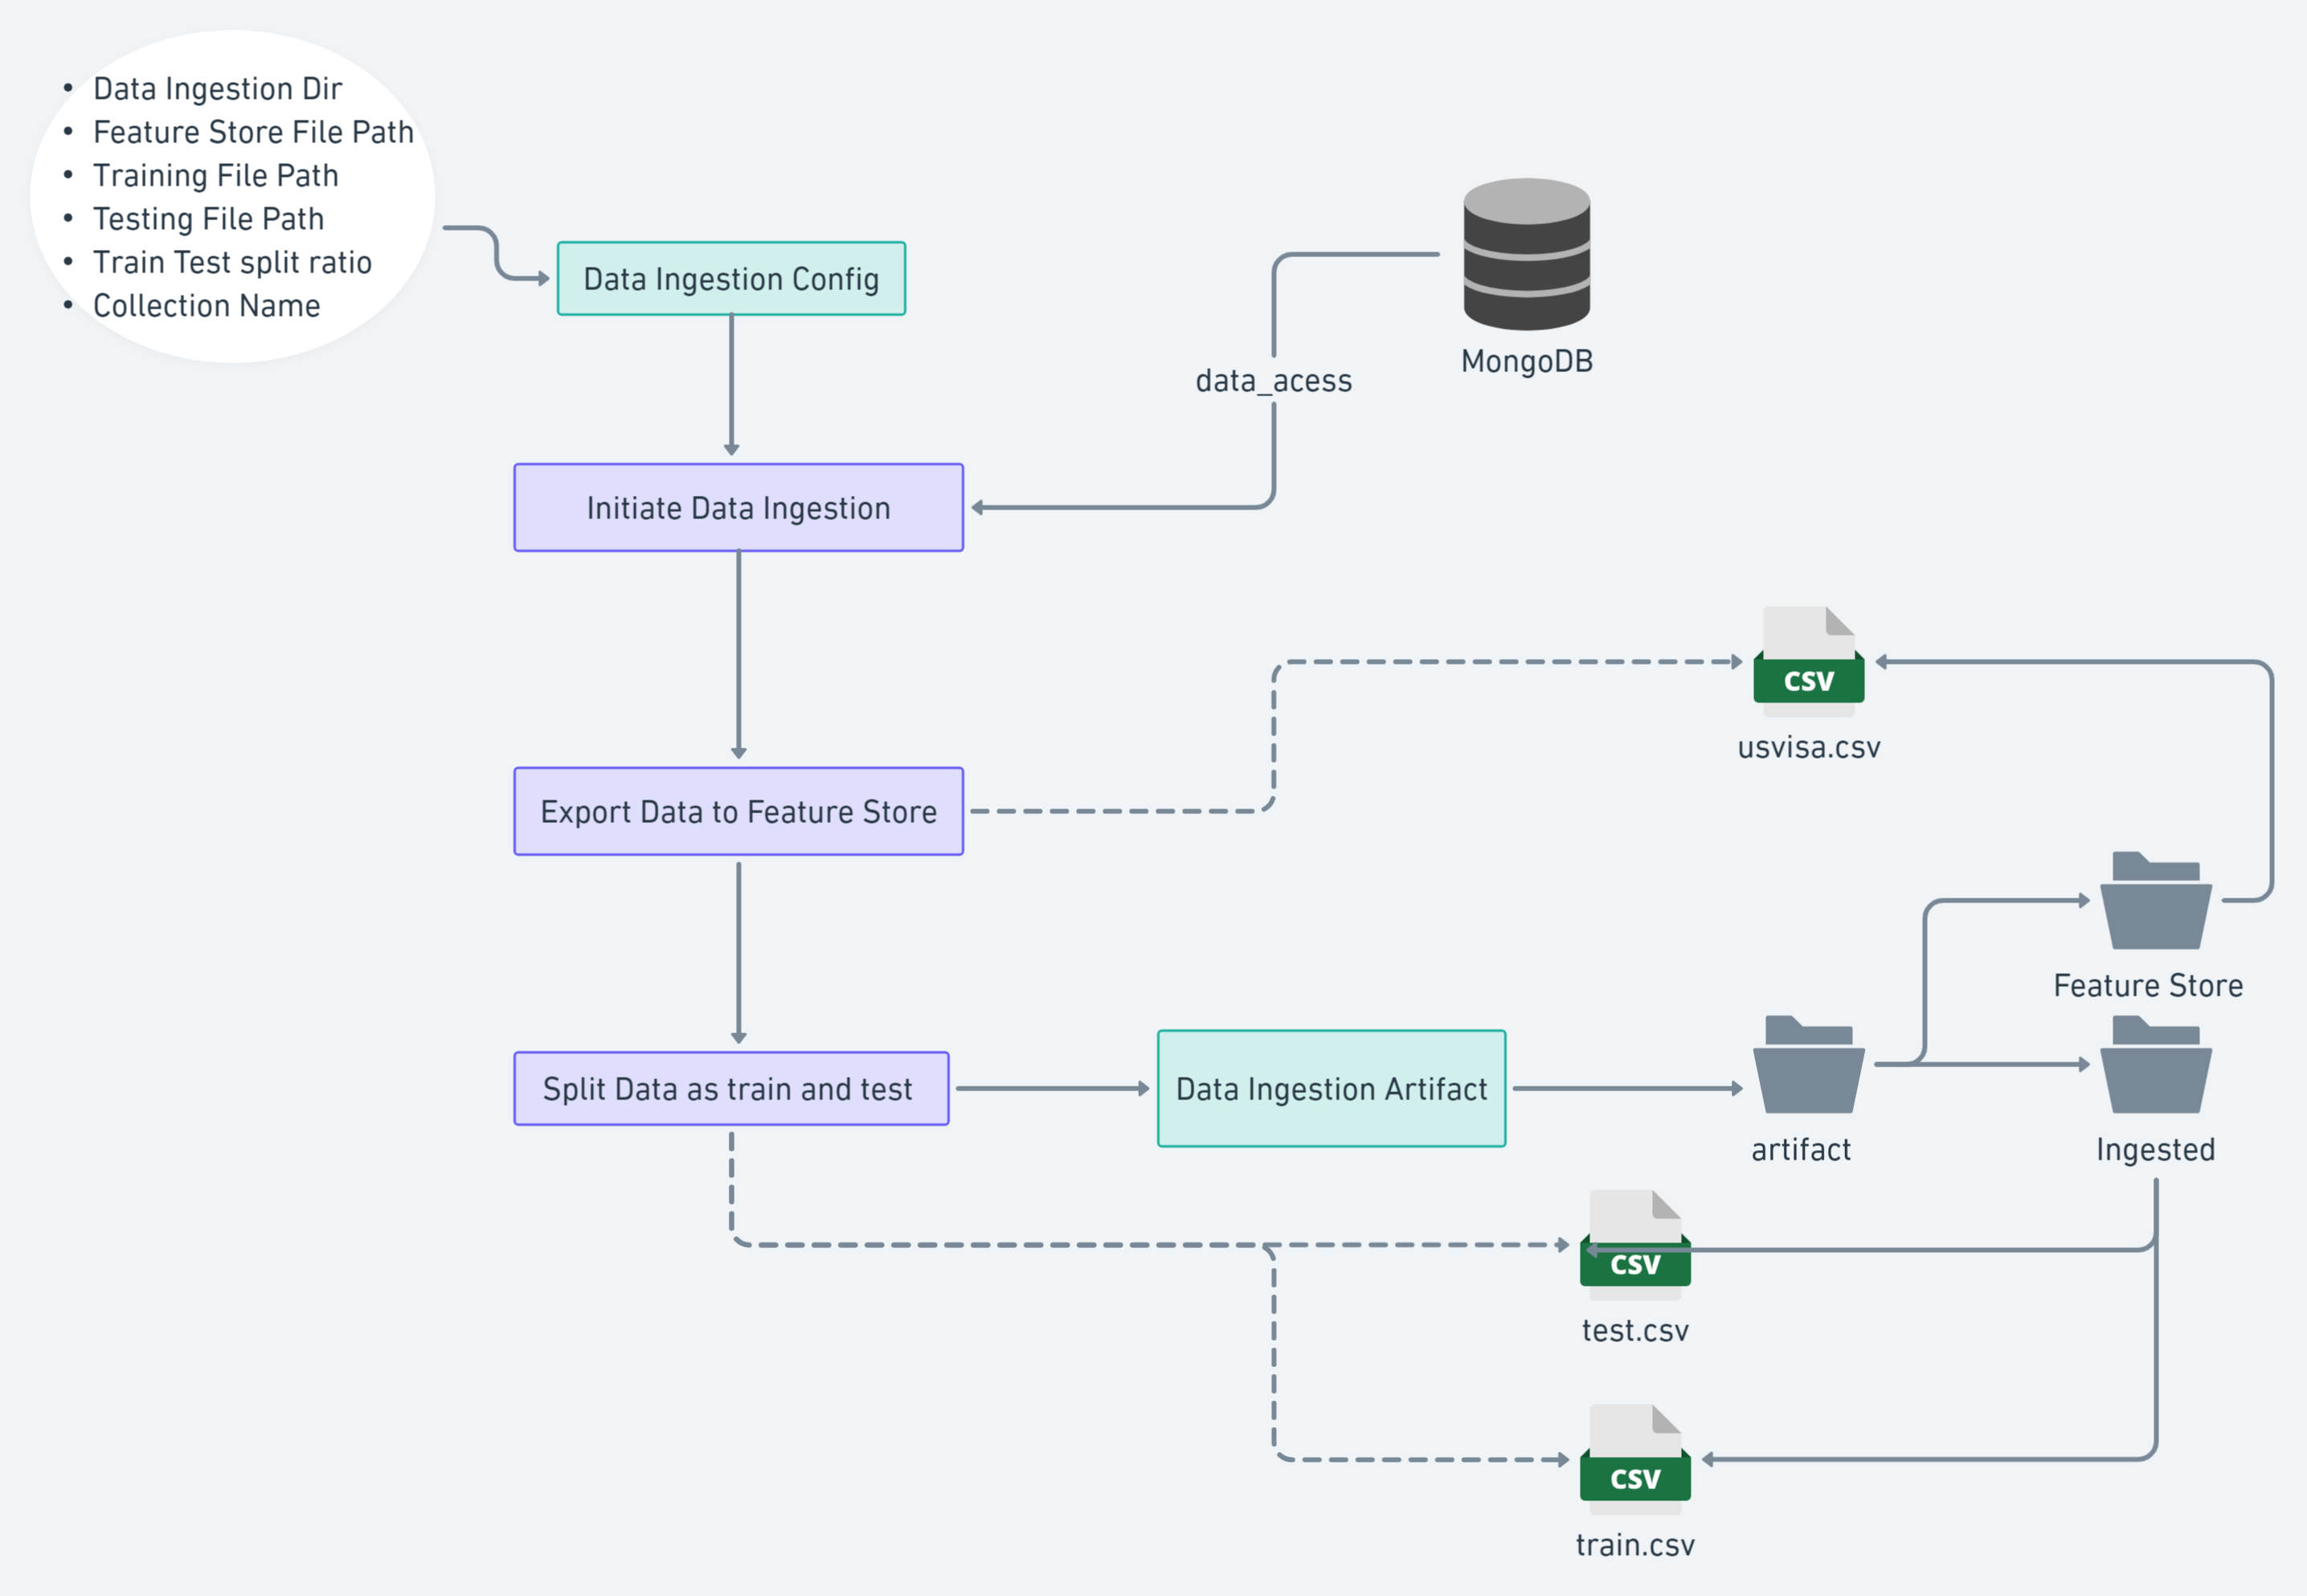

#### For feature engineering train-test split the data but for EDA keep full data and perform analysis

### Artifacts are all the important outputs your ML workflow creates that you may need later for debugging, deployment, or reproducibility.

## Project Workflow: (Which file should i modify first)

1. constants
2. entity
3. components
4. pipeline
5. Main file


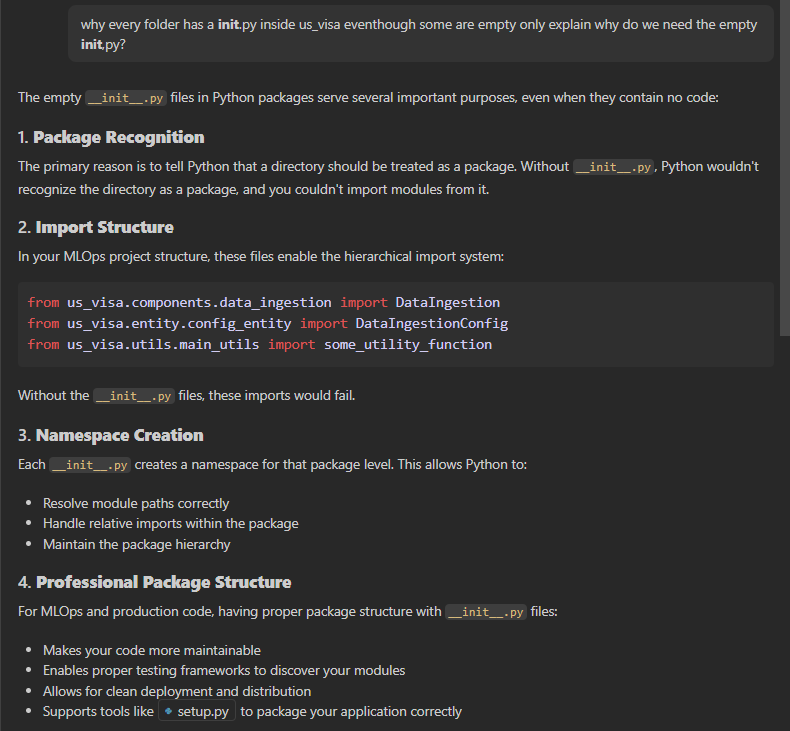  

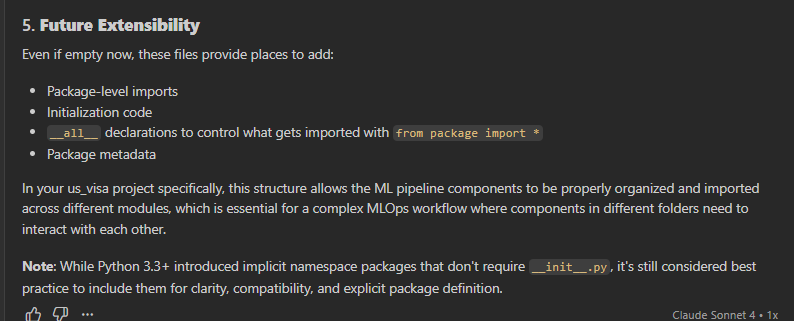

# Constructor  

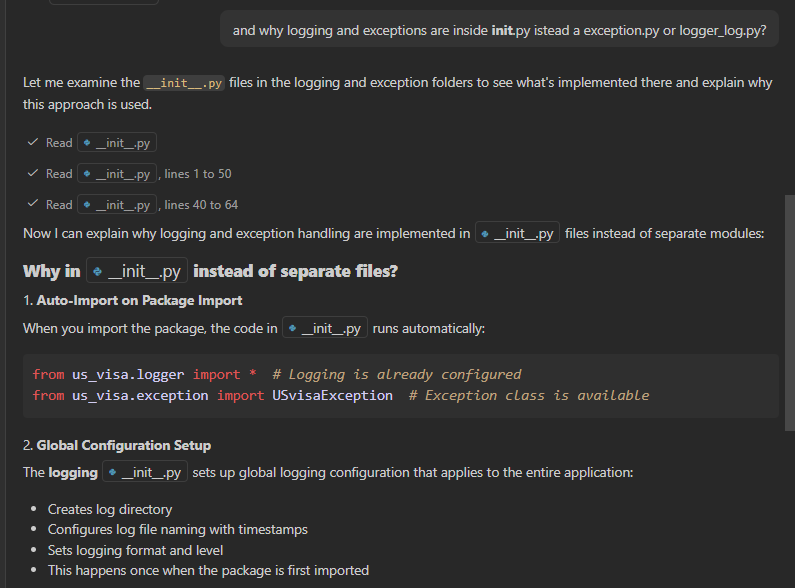  

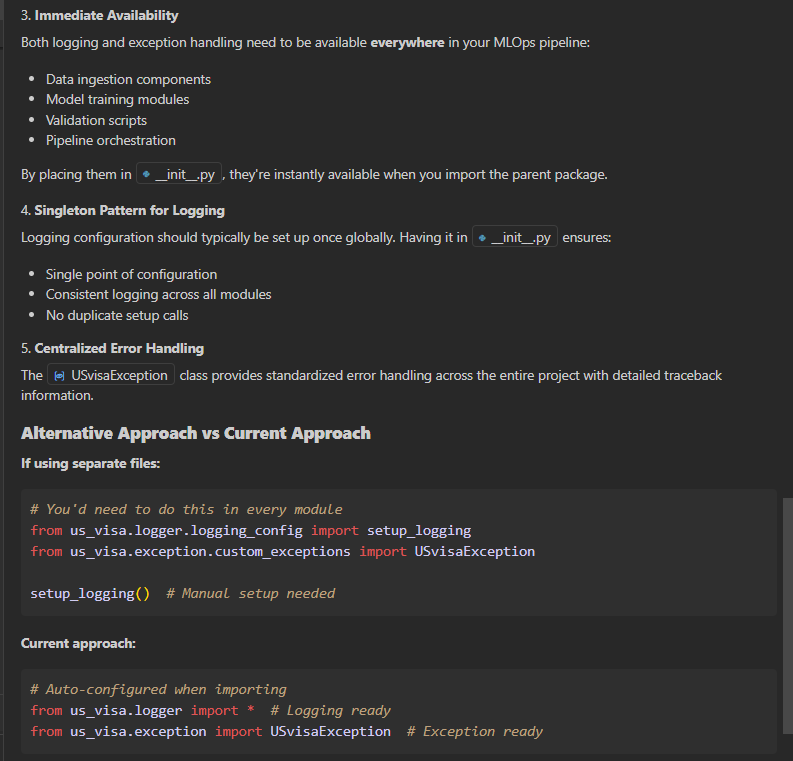  

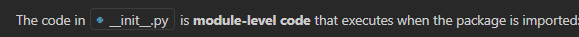

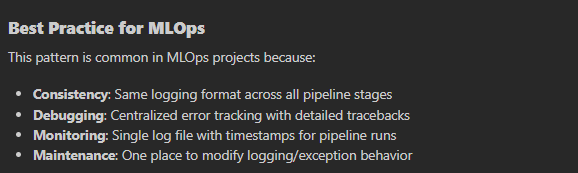

## Video 4 (https://www.youtube.com/watch?v=tqu9FqGY3q4&list=PLkz_y24mlSJZvJOj1UXiJPVRQrNFdNEXX&index=6)

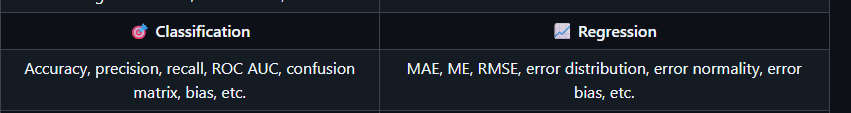

## Datadrift   

### This means you deployed a model to production four months ago, and now, when you use the model for inference, the incoming data has changed. That means the distribution of the data the model trained is changed over time and now the new data has a different distribution, so you may have to retrain the model.    


### Data drift can appear in several forms depending on how the incoming data changes over time. One common type is feature distribution drift, where the statistical shape or range of a column changes significantly, such as when the average house area suddenly becomes much larger than it was in the training data. Another form is covariate drift, which happens when the relationships between input features shift, even if the individual features look normal on their own. There is also prior probability drift, where the distribution of the target variable changes, such as when the proportion of positive and negative cases becomes very different from what the model originally learned. In some cases, new categories appear in categorical features or old categories disappear, which also introduces drift because the model was not trained to understand those values. All of these variations represent situations where the data in production no longer matches the patterns the model learned during training, causing performance to decline unless the drift is detected and addressed.

### Types
* Feature distribution drift: The statistical shape or range of a feature changes over time. For example, the average house area becomes much larger in new data than in the training data.
* Covariate drift: The relationships between input features shift, even if each feature individually appears normal. The interaction between features changes in a way the model did not learn.
* Prior probability drift: The distribution of the target variable changes. For example, the ratio of positive to negative cases in production becomes very different from what the model saw during training.
* Categorical value drift: New categories appear or old categories disappear in a feature. Since the model was never trained on these new values, its predictions become unreliable. (Eg: ICD 10 CODES)
* Overall data mismatch: All these forms of drift indicate that the data in production no longer matches the patterns the model learned, which leads to degraded performance unless the drift is detected and handled.

#### Data drift is a change in the statistical properties of data over time, especially between the data used to train a machine learning model and the data the model receives during testing or production.




#### When a model is trained, it learns patterns from the training data, assuming that future data will follow the same distribution. But if the real-world data begins to shift—meaning the patterns, ranges, or relationships between features change—the model may no longer perform well because it is seeing something different from what it learned. This mismatch between the training distribution and the current or incoming data distribution is called data drift. It often leads to degraded model accuracy and unreliable predictions. Detecting data drift helps ensure that the model is still valid and that the underlying data is consistent with what the model expects.   

#### Read Below Important!!!
In production, we do not retrain the model every day; the model usually stays the same for days, weeks, or even months. But the real-world data coming in every day can change in subtle or major ways. Because the model was trained on older data, it may not understand these new patterns. This mismatch between the old training data and the new incoming data is what we call data drift. Detecting this drift helps us know when the data has changed enough that the model needs to be retrained. Without this monitoring, the model keeps making predictions on shifted data and its accuracy slowly gets worse.   


To make sure data drift never goes unnoticed, we continuously monitor the data coming into the system and compare it to the data the model was originally trained on. Tools like Evidently, WhyLabs, or custom statistical tests measure whether the distributions, ranges, or patterns of each feature have changed beyond a normal threshold. For example, they compare the training data distribution of a feature like “area” with the new incoming data; if the values are suddenly much larger or shaped differently, the system flags this as drift. These monitoring tools run automatically at regular intervals—daily, hourly, or even in real-time—so any significant change in the data is detected quickly. When drift is detected, alerts are sent to the engineering team or an automated retraining pipeline is triggered, ensuring the model is updated before its performance degrades.  

# Why data validation needed?

### Data validation is needed to ensure that the data entering a machine learning pipeline or a production model is in the correct format, contains all required columns, and follows the same structure that the model was trained on. If the schema changes—such as missing columns, new unexpected columns, or wrong data types—the model may break or produce unreliable predictions. Even when the structure is correct, the values themselves might change in unexpected ways, which can lead to data drift or faulty outputs. By validating the data before training or inference, we can catch these issues early, prevent model failures, and maintain the quality and stability of the entire ML system.